In [95]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [96]:
##Load data from MNIST(Modified National Institute of Standards and Technology)

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

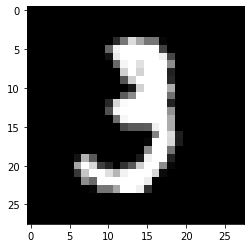

(28, 28)

In [98]:
plt.plot()
plt.imshow(x_train[10], cmap ='gray')
plt.show()
x_train[10].shape

In [99]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils import np_utils

In [100]:
x_train.shape

(60000, 28, 28)

In [101]:
#convolutions expect pixel values in dimesions [pixels][height][width][channel-list(3 for RGB, 1 for Gray)] 
#reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') 


In [102]:
#normalise data image pixels value to range 0-1
x_train = x_train/255
x_test = x_test/255

In [103]:
#Hot Encoding using to_categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [104]:
#Building Neural Nets

In [105]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [106]:
#model

def CnnModel():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape = (28, 28, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(y_test.shape[1], activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [107]:
#Run the model
model = CnnModel()
#fit
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs =15, batch_size = 255)
#model Evaluation , verbose =1 will show the animated progress bar
result = model.evaluate(x_test, y_test, verbose=1)
error = 100-(result[1] * 100)
print(error)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 305us/step - loss: 0.2770 - acc: 0.9219 - val_loss: 0.0996 - val_acc: 0.9692
Epoch 2/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0874 - acc: 0.9735 - val_loss: 0.0531 - val_acc: 0.9828
Epoch 3/15
60000/60000 [==============================] - 18s 302us/step - loss: 0.0606 - acc: 0.9820 - val_loss: 0.0393 - val_acc: 0.9879
Epoch 4/15
60000/60000 [==============================] - 18s 299us/step - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0426 - val_acc: 0.9857
Epoch 5/15
60000/60000 [==============================] - 18s 298us/step - loss: 0.0394 - acc: 0.9885 - val_loss: 0.0357 - val_acc: 0.9883
Epoch 6/15
60000/60000 [==============================] - 18s 301us/step - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 7/15
60000/60000 [==============================] - 18s 305us/step - loss: 0.0298 - acc: 0.9904 - val_loss: 0.

In [25]:
#Save model

Trained model saved at model/DigitRecogntion.h5 


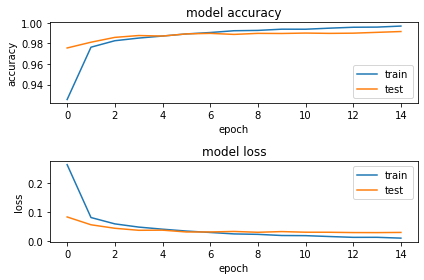

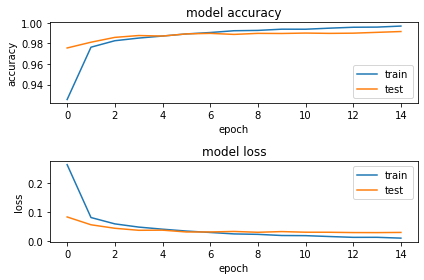

In [26]:
import os
save_dir = "model/"
model_name = 'DigitRecogntion.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Trained model saved at %s ' % model_path)

# plotting
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [27]:
from keras import models 
mnist_model = models.load_model("model/DigitRecogntion.h5")
loss_and_metrics = mnist_model.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.029397980858544906
Test Accuracy 0.9916


In [28]:
#predictions

actual value:  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
actual value:  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
actual value:  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
actual value:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


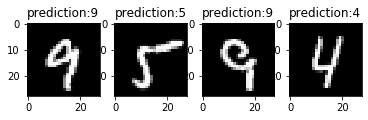

In [163]:
import matplotlib.pyplot as plt
import random

f = plt.figure()

for i in range(0,4):
    x = random.randint(1,100)
    image_index = 4286+x
    f.add_subplot(1, 4,i+1)
    plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
    predict = model.predict(x_test[image_index].reshape(1,28,28,1))
    plt.title("prediction:{}".format(predict.argmax()))
    print("actual value: ", y_test[1586+x])